****************************************************************
PSNR and SSIM for rome: 18.467773180815207 and 0.43462201156724967
Runtime for rome: 11.566535949707031 seconds
----------------------------------------------------------------
PSNR and SSIM for iitk: 30.96277822668588 and 0.7188696573088111
Runtime for iitk: 75.13119673728943 seconds
****************************************************************


Text(0.5, 1.0, 'Bilateral Filtered')

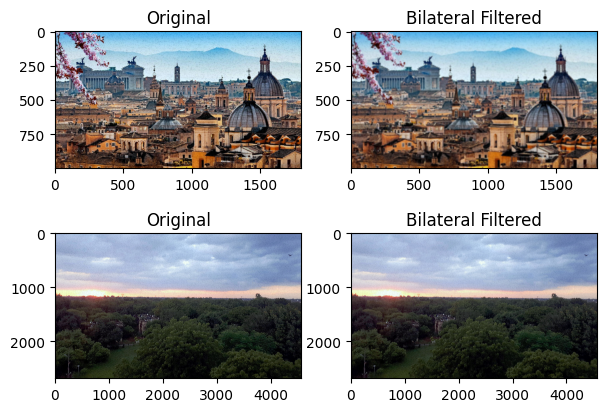

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import time
import skimage
from skimage import metrics
import PIL

def filtering(image):
  w=4;
  height = image.shape[0]
  width = image.shape[1]
  sigma_s=10;sigma_r=60;

  spatial_kernel = []
  for i in range(-w, w+1):
      for j in range(-w, w+1):
          spatial_kernel.append(np.exp(-(1/(2*(sigma_s**2)))*(i**2+j**2)/(max(1, w/2)**2)))

  Img_pad = np.pad(image, w, mode="edge")

  out_image = np.zeros(image.shape)
  weight = np.zeros(image.shape)

  index=0
  for row in range(-w, 1+w):
      for col in range(-w, 1+w):
          range_kernel=np.exp(-(1/(2*(sigma_r**2)))*(Img_pad[w+row:height+w+row, w+col:width+w+col]-image[row,col])**2)
          domain_kernel = range_kernel*spatial_kernel[index]
          out_image += domain_kernel*Img_pad[w+row:height+w+row, w+col:width+w+col]
          weight += domain_kernel
          index+=1
  out_image /= weight
  return out_image
def metrics(img,img_filter):
  psnr=skimage.metrics.peak_signal_noise_ratio(img, img_filter, data_range=None)
  ssim=skimage.metrics.structural_similarity(img, img_filter, win_size=None, gradient=False, data_range=None, channel_axis=None, multichannel=True, gaussian_weights=False, full=False)
  return [psnr,ssim]
img1 = cv2.imread('rome.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread('iitk.jpg')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

start1 = time.time()
bf_img1=np.zeros(img1.shape,dtype=np.uint8)
bf_img1[:,:,0] = filtering(img1[:,:,0])
bf_img1[:,:,1] = filtering(img1[:,:,1])
bf_img1[:,:,2] = filtering(img1[:,:,2])
execution_time1=time.time()-start1
start2 = time.time()
bf_img2=np.zeros(img2.shape,dtype=np.uint8)
bf_img2[:,:,0] = filtering(img2[:,:,0])
bf_img2[:,:,1] = filtering(img2[:,:,1])
bf_img2[:,:,2] = filtering(img2[:,:,2])
execution_time2=time.time()-start2

[psnr1,ssim1]=metrics(img1,bf_img1)
[psnr2,ssim2]=metrics(img2,bf_img2)

print("****************************************************************")
print('PSNR and SSIM for rome:',psnr1 ,'and', ssim1)
print("Runtime for rome: " +str(execution_time1),"seconds")
print("----------------------------------------------------------------")
print('PSNR and SSIM for iitk:',psnr2 ,'and', ssim2)
print("Runtime for iitk: " +str(execution_time2),"seconds")
print("****************************************************************")

plt.figure(figsize=[7,5], dpi=100)
plt.subplot(2, 2, 1)
plt.imshow(img1); plt.title("Original")
plt.subplot(2, 2, 2)
plt.imshow(bf_img1); plt.title("Bilateral Filtered")
plt.subplot(2, 2, 3)
plt.imshow(img2); plt.title("Original")
plt.subplot(2, 2, 4)
plt.imshow(bf_img2); plt.title("Bilateral Filtered")